In [154]:
import sys;import os;
module_path = os.path.abspath(os.path.join('..')).split('PythonCode')[0]+'PythonCode'
if module_path not in sys.path: sys.path.append(module_path+"/")
    
import Plib.DataFarm.FRData as fr
import Plib.Keystore as kst
import Plib.Utils.Tools as tl

ks=kst.Keystore()
import datetime
import warnings
warnings.filterwarnings("ignore")

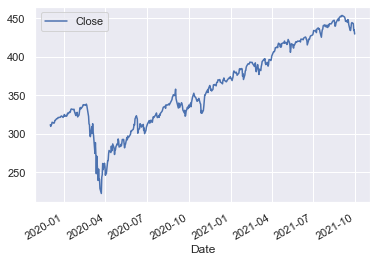

In [155]:
import Plib.DataFarm.Kibot as kb
df=kb.get_eod_data('SPY','2019-11-30','2021-09-30')
df[['Close']].plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x554b16bad0>]],
      dtype=object)

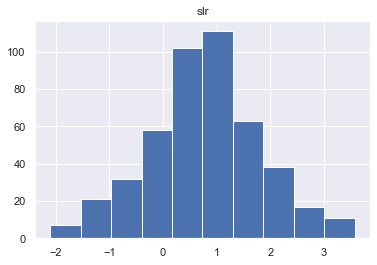

In [197]:
from numpy import sqrt,where
df['slr'] = df['Close'].pct_change().dropna().rolling('25d').apply(lambda x: sqrt(25) * (x.mean() / x.std()))
df[['slr']].hist()

In [200]:
df['signal']=where(df['slr']>1.2,1,0)

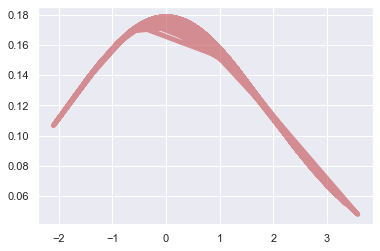

In [194]:
from scipy.stats import logistic
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

ax.plot(df.slr, logistic.pdf(df.slr,loc=0, scale=1.4), 'r-', lw=5, alpha=0.6, label='logistic pdf')

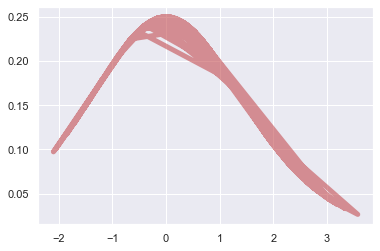

In [2]:
#def getFundD():
#def getIncomeStat(df):
#def getBalanceSheet(df):
#def getCashflowStat(df):
#def getValuationM(df):
#def getRatios(df):


In [3]:
#tickers=list(fr.getFundD().Ticker)

In [4]:
#fhist=fr.getData('fund','AAPL')

In [5]:
import pickle
fname='fund45h.pickle'
with open(fname, 'rb') as handle:
    fhist = pickle.load(handle) 
fname='fund45.pickle'
with open(fname, 'rb') as handle:
    data = pickle.load(handle) 
tickers=list(data.Ticker)


In [6]:
#fname='fund45h.pickle'
#with open(fname, 'wb') as handle:
#    pickle.dump(fhist, handle, protocol=pickle.HIGHEST_PROTOCOL)        

In [7]:
#import pickle
#fname='fund45.pickle'
#with open(fname, 'wb') as handle:
#    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)        

In [8]:
def cdatei(df):
    from datetime import timedelta
    df['Date'] = df.index - timedelta(days=32)
    return df.set_index('Date')

def getCols(bs,vl,cfs,ist,rts):
    import pandas as pd
    df1=pd.merge(cdatei(bs), cdatei(vl), left_index=True, right_index=True)
    df2=pd.merge(cdatei(cfs), cdatei(ist), left_index=True, right_index=True)
    df3=pd.merge(df1,df2, left_index=True, right_index=True)
    return pd.merge(df3,cdatei(rts), left_index=True, right_index=True)

def getIntCovratio(fhist, y=5):
    return fr.getValuationM(fhist).tail(y)['EBITDA'].mean()/fr.getIncomeStat(fhist).tail(y)['InterestIncome/Expense'].mean()

def getCostDebt2(ir,interest_coverage_ratio):
    if (interest_coverage_ratio > 8.5):  credit_spread = 0.0063                                        #Rating is AAA  
    if (interest_coverage_ratio > 6.5) & (interest_coverage_ratio <= 8.5): credit_spread = 0.0078    #Rating is AA
    if (interest_coverage_ratio > 5.5) & (interest_coverage_ratio <=  6.5): credit_spread = 0.0098   #Rating is A+
    if (interest_coverage_ratio > 4.25) & (interest_coverage_ratio <=  5.49): credit_spread = 0.0108 #Rating is A
    if (interest_coverage_ratio > 3) & (interest_coverage_ratio <=  4.25): credit_spread = 0.0122    #Rating is A-
    if (interest_coverage_ratio > 2.5) & (interest_coverage_ratio <=  3): credit_spread = 0.0156     #Rating is BBB
    if (interest_coverage_ratio > 2.25) & (interest_coverage_ratio <=  2.5): credit_spread = 0.02    #Rating is BB+
    if (interest_coverage_ratio > 2) & (interest_coverage_ratio <=  2.25): credit_spread = 0.0240    #Rating is BB
    if (interest_coverage_ratio > 1.75) & (interest_coverage_ratio <=  2): credit_spread = 0.0351    #Rating is B+
    if (interest_coverage_ratio > 1.5) & (interest_coverage_ratio <=  1.75): credit_spread = 0.0421  #Rating is B
    if (interest_coverage_ratio > 1.25) & (interest_coverage_ratio <=  1.5): credit_spread = 0.0515  #Rating is B-
    if (interest_coverage_ratio > 0.8) & (interest_coverage_ratio <=  1.25): credit_spread = 0.0820  #Rating is CCC
    if (interest_coverage_ratio > 0.65) & (interest_coverage_ratio <=  0.8): credit_spread = 0.0864  #Rating is CC
    if (interest_coverage_ratio > 0.2) & (interest_coverage_ratio <=  0.65): credit_spread = 0.1134  #Rating is C
    if interest_coverage_ratio <=  0.2: credit_spread = 0.1512                                       #Rating is D
    return ir + credit_spread

def getEffTaxRate(fhist, yavg=5):
    IS=fr.getIncomeStat(fhist).tail(yavg).mean()
    return IS['TaxExpense']/(IS['NetIncome']+IS['TaxExpense'])

def getCostDebt(ir, etr):
    return ir*(1-etr)

def getCostEquity(ir, beta, imk):
    return ir + beta*imk

def getWacc(mve, mvd, ce, cd): # dr
    we,wd= mve/(mve+mvd),mvd/(mve+mvd)
    return we*ce + wd*cd

def getDCF(cf, gr, y, dr):
    df=1/(1+dr)**y
    pcf=cf*(1+gr)**y
    return pcd * df

def getNPV(dcf=[]):
    import numpy as np
    return np.asarray(dcf).sum()

def getTerminalValue(cf, gr, perp_gr, dr, y):
    last_pcf=cf*(1+gr)**y
    return (last_pcf*(1+perp_gr))/(dr-perp_gr)

def getTerminalValue(cf, gr, perp_gr, dr, y):
    last_pcf=cf*(1+gr)**y
    return (last_pcf*(1+perp_gr))/(dr-perp_gr)

def getDTV(tv, dr, y):
    df=1/(1+dr)**y
    return tv*df

def getIntrinsicValue(npv, tv):
    return npv + tv

def getBeta():
    return 0

def getMarketReturn():
    return 0


In [9]:
fr.getIncomeStat(fhist).tail(1).columns

Index(['Revenues', 'CostofGoods', 'GrossProfit', 'General/AdminExpense',
       'Sales+MarketingExpense', 'Research&Development', 'OperatingIncome',
       'InterestIncome/Expense', 'OtherIncome/ExpenseNet', 'TaxExpense',
       'NetIncome', 'EarningsPerShare(Basic)', 'EarningsPerShare(Diluted)'],
      dtype='object')

In [10]:
fr.getBalanceSheet(fhist).tail(1).columns

Index(['WeightedAverageShares', 'WeightedAverageShares(Diluted)',
       'CashAndEquivalents', 'Short-TermInvestments',
       'CashAndShort-TermInvestments', 'Receivables', 'Inventory',
       'OtherCurrentAssets', 'CurrentAssets', 'PropertyPlant&Equipment',
       'TaxAssets', 'Long-TermInvestments', 'Goodwill',
       'OtherIntangibleAssets', 'GoodwillandIntangibleAssets',
       'OtherNon-CurrentAssets', 'Non-CurrentAssets', 'OtherAssets',
       'TotalAssets', 'Payables', 'Short-TermDebt', 'TaxPayables',
       'DeferredRevenue', 'OtherCurrentLiabilities', 'CurrentLiabilities',
       'Long-TermDebt', 'DeferredRevenueNon-Current', 'DeferredTaxNon-Current',
       'OtherNon-CurrentLiabilities', 'Non-CurrentLiabilities',
       'OtherLiabilities', 'TotalLiabilities', 'CommonStock',
       'RetainedEarnings', 'AccumulatedOtherComp.Income/Loss',
       'OtherStockholdersEquity'],
      dtype='object')

In [11]:
fr.getCashflowStat(fhist).tail(1).columns

Index(['TotalStockholdersEquity', 'TotalLiabilities&StockholdersEquity',
       'NetIncome', 'DepreciationAndAmortization', 'DeferredIncomeTax',
       'StockBasedCompensation', 'ChangeInWorkingCapital',
       'AccountsReceivables', 'Inventory', 'AccountsPayables',
       'OtherWorkingCapital', 'OtherNonCashItems',
       'CashFlowFromOperatingActivities', 'CapitalExpenditure',
       'NetAcquisitions', 'PurchasesOfInvestments', 'OtherInvesting',
       'NetCashFromInvesting', 'DebtRepayment', 'CommonStockIssued',
       'CommonStockRepurchased', 'DividendsPaid', 'OtherFinancingActivites',
       'NetCashFromFinancing', 'FXEffect', 'NetChangeInCash'],
      dtype='object')

In [12]:
fr.getValuationM(fhist).tail(1).columns

Index(['CashAtEndOfPeriod', 'CashAtStartOfPeriod', 'EBITDA', 'FreeCashFlow'], dtype='object')

In [13]:
fr.getRatios(fhist).tail(1).columns

Index(['EnterpriseValuation', 'MarketCapitalization', 'BookValuePerShare',
       'EnterpriseValuetoEBITDA', 'FreeCashFlowPerShare', 'PriceToSales',
       'PriceToEarningsRatio', 'PriceToBookValue', 'PriceToFreeCashFlow',
       'EarningsYield', 'InventoryTurnover', 'CurrentRatio',
       'DebttoEquityRatio', 'EBITDAmargin', 'GrossMargin', 'NetIncomeMargin',
       'GrossMargin', 'DividendYield', 'PayoutRatio', 'ReturnOnAssets'],
      dtype='object')

In [14]:
bs=fr.getBalanceSheet(fhist).tail(10)[['WeightedAverageShares', 'WeightedAverageShares(Diluted)']]
bs

WeightedAverageShares  WeightedAverageShares(Diluted)
2020-01-31             17660160.0                      17818416.0
2020-04-30             17440404.0                      17618764.0
2020-07-31             17250292.0                      17419152.0
2020-10-31             17057622.0                      17256521.0
2021-01-31             16935119.0                      17113688.0
2021-04-30             16753476.0                      16929157.0
2021-07-31             16629371.0                      16781735.0
2021-10-31             16487121.0                      16635097.0
2022-01-31             16391724.0                      16519291.0
2022-04-30             16391724.0                      16519291.0

In [15]:
vl=fr.getValuationM(fhist).tail(10)[['EBITDA','FreeCashFlow']]
vl

EBITDA  FreeCashFlow
2020-01-31  29519000.0    28409000.0
2020-04-30  16678000.0    11458000.0
2020-07-31  16586000.0    14706000.0
2020-10-31  18237000.0    18792000.0
2021-01-31  36883000.0    35263000.0
2021-04-30  31478000.0    21712000.0
2021-07-31  27866000.0    19001000.0
2021-10-31  26909000.0    16977000.0
2022-01-31  44632000.0    44163000.0
2022-04-30  32876000.0    25652000.0

In [83]:
cfs=fr.getCashflowStat(fhist).tail(10)[['DividendsPaid','CapitalExpenditure','DepreciationAndAmortization']]
cfs

DividendsPaid  CapitalExpenditure  DepreciationAndAmortization
2020-01-31     -3539000.0          -2107000.0                    2816000.0
2020-04-30     -3375000.0          -1853000.0                    2786000.0
2020-07-31     -3656000.0          -1565000.0                    2752000.0
2020-10-31     -3511000.0          -1784000.0                    2702000.0
2021-01-31     -3613000.0          -3500000.0                    2666000.0
2021-04-30     -3447000.0          -2269000.0                    2797000.0
2021-07-31     -3767000.0          -2093000.0                    2832000.0
2021-10-31     -3640000.0          -3223000.0                    2989000.0
2022-01-31     -3732000.0          -2803000.0                    2697000.0
2022-04-30     -3595000.0          -2514000.0                    2737000.0

In [84]:
ist=fr.getIncomeStat(fhist).tail(10)[['Revenues','GrossProfit','TaxExpense',
       'NetIncome', 'EarningsPerShare(Basic)', 'EarningsPerShare(Diluted)']]
ist

Revenues  GrossProfit  TaxExpense   NetIncome  \
2020-01-31   91819000.0   35217000.0   3682000.0  22236000.0   
2020-04-30   58313000.0   22370000.0   1886000.0  11249000.0   
2020-07-31   59685000.0   22680000.0   1884000.0  11253000.0   
2020-10-31   64698000.0   24689000.0   2228000.0  12673000.0   
2021-01-31  111439000.0   44328000.0   4824000.0  28755000.0   
2021-04-30   89584000.0   38079000.0   4381000.0  23630000.0   
2021-07-31   81434000.0   35255000.0   2625000.0  21744000.0   
2021-10-31   83360000.0   35174000.0   2697000.0  20551000.0   
2022-01-31  123945000.0   54243000.0   6611000.0  34630000.0   
2022-04-30   97278000.0   42559000.0   5129000.0  25010000.0   

            EarningsPerShare(Basic)  EarningsPerShare(Diluted)  
2020-01-31                   1.2600                     1.2475  
2020-04-30                   0.6450                     0.6375  
2020-07-31                   0.6525                     0.6450  
2020-10-31                   0.7400                     0.7300  
2021-01-31                   1.7000                     1.6800  
2021-04-30                   1.4100                     1.4000  
2021-07-31                   1.3100                     1.3000  
2021-10-31                   1.2500                     1.2400  
2022-01-31                   2.1100                     2.1000  
2022-04-30                   1.5300                     1.5100

In [85]:
rts=fr.getRatios(fhist).tail(10)[['EnterpriseValuation','MarketCapitalization']]
rts

EnterpriseValuation  MarketCapitalization
2020-01-31         1.348000e+09          1.279479e+09
2020-04-30         1.149504e+09          1.080171e+09
2020-07-31         1.604395e+09          1.525055e+09
2020-10-31         1.989650e+09          1.915230e+09
2021-01-31         2.390894e+09          2.314861e+09
2021-04-30         2.113868e+09          2.030689e+09
2021-07-31         2.301277e+09          2.213536e+09
2021-10-31         2.512067e+09          2.422288e+09
2022-01-31         3.041599e+09          2.955920e+09
2022-04-30         2.955845e+09          2.863962e+09

In [86]:
bs=fr.getBalanceSheet(fhist).tail(10)[['WeightedAverageShares', 'WeightedAverageShares(Diluted)']]
vl=fr.getValuationM(fhist).tail(10)[['EBITDA','FreeCashFlow']]
cfs=fr.getCashflowStat(fhist).tail(10)[['DividendsPaid','CapitalExpenditure','DepreciationAndAmortization']]
ist=fr.getIncomeStat(fhist).tail(10)[['Revenues','GrossProfit','TaxExpense',
       'NetIncome', 'EarningsPerShare(Basic)', 'EarningsPerShare(Diluted)']]
rts=fr.getRatios(fhist).tail(10)[['EnterpriseValuation','MarketCapitalization']]

getCols(bs,vl,cfs,ist,rts)

WeightedAverageShares  WeightedAverageShares(Diluted)      EBITDA  \
Date                                                                            
2019-12-30             17660160.0                      17818416.0  29519000.0   
2020-03-29             17440404.0                      17618764.0  16678000.0   
2020-06-29             17250292.0                      17419152.0  16586000.0   
2020-09-29             17057622.0                      17256521.0  18237000.0   
2020-12-30             16935119.0                      17113688.0  36883000.0   
2021-03-29             16753476.0                      16929157.0  31478000.0   
2021-06-29             16629371.0                      16781735.0  27866000.0   
2021-09-29             16487121.0                      16635097.0  26909000.0   
2021-12-30             16391724.0                      16519291.0  44632000.0   
2022-03-29             16391724.0                      16519291.0  32876000.0   

            FreeCashFlow  DividendsPaid  CapitalExpenditure  \
Date                                                          
2019-12-30    28409000.0     -3539000.0          -2107000.0   
2020-03-29    11458000.0     -3375000.0          -1853000.0   
2020-06-29    14706000.0     -3656000.0          -1565000.0   
2020-09-29    18792000.0     -3511000.0          -1784000.0   
2020-12-30    35263000.0     -3613000.0          -3500000.0   
2021-03-29    21712000.0     -3447000.0          -2269000.0   
2021-06-29    19001000.0     -3767000.0          -2093000.0   
2021-09-29    16977000.0     -3640000.0          -3223000.0   
2021-12-30    44163000.0     -3732000.0          -2803000.0   
2022-03-29    25652000.0     -3595000.0          -2514000.0   

            DepreciationAndAmortization     Revenues  GrossProfit  TaxExpense  \
Date                                                                            
2019-12-30                    2816000.0   91819000.0   35217000.0   3682000.0   
2020-03-29                    2786000.0   58313000.0   22370000.0   1886000.0   
2020-06-29                    2752000.0   59685000.0   22680000.0   1884000.0   
2020-09-29                    2702000.0   64698000.0   24689000.0   2228000.0   
2020-12-30                    2666000.0  111439000.0   44328000.0   4824000.0   
2021-03-29                    2797000.0   89584000.0   38079000.0   4381000.0   
2021-06-29                    2832000.0   81434000.0   35255000.0   2625000.0   
2021-09-29                    2989000.0   83360000.0   35174000.0   2697000.0   
2021-12-30                    2697000.0  123945000.0   54243000.0   6611000.0   
2022-03-29                    2737000.0   97278000.0   42559000.0   5129000.0   

             NetIncome  EarningsPerShare(Basic)  EarningsPerShare(Diluted)  \
Date                                                                         
2019-12-30  22236000.0                   1.2600                     1.2475   
2020-03-29  11249000.0                   0.6450                     0.6375   
2020-06-29  11253000.0                   0.6525                     0.6450   
2020-09-29  12673000.0                   0.7400                     0.7300   
2020-12-30  28755000.0                   1.7000                     1.6800   
2021-03-29  23630000.0                   1.4100                     1.4000   
2021-06-29  21744000.0                   1.3100                     1.3000   
2021-09-29  20551000.0                   1.2500                     1.2400   
2021-12-30  34630000.0                   2.1100                     2.1000   
2022-03-29  25010000.0                   1.5300                     1.5100   

            EnterpriseValuation  MarketCapitalization  
Date                                                   
2019-12-30         1.348000e+09          1.279479e+09  
2020-03-29         1.149504e+09          1.080171e+09  
2020-06-29         1.604395e+09          1.525055e+09  
2020-09-29         1.989650e+09          1.915230e+09  
2020-12-30         2.390894e+09     